In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Lazy courses/DS:Deep Learning in Python/NN -Fundamental concepts from scratch')

In [4]:
from __future__ import print_function, division
from builtins import range

from keras.models import Model
from keras.layers import Dense, Input
from util import get_normalized_data, y2indicator

import matplotlib.pyplot as plt

Xtrain, Xtest, Ytrain, Ytest = get_normalized_data()

# get shapes
N, D = Xtrain.shape
K = len(set(Ytrain))

# by default Keras wants one-hot encoded labels
# there's another cost function we can use
# where we can just pass in the integer labels directly
# just like Tensorflow / Theano
Ytrain = y2indicator(Ytrain)
Ytest = y2indicator(Ytest)


# ANN with layers [784] -> [500] -> [300] -> [10]
i = Input(shape=(D,))
x = Dense(500, activation='relu')(i)
x = Dense(300, activation='relu')(x)
x = Dense(K, activation='softmax')(x)
model = Model(inputs=i, outputs=x)


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# note: multiple ways to choose a backend
# either theano, tensorflow, or cntk
# https://keras.io/backend/


# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=15, batch_size=32)
print("Returned:", r)

Reading in and transforming data





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 41000 samples, validate on 1000 samples
Epoch 1/15





41000/41000 [==============================] - 15s 362us/step - loss: 0.2391 - acc: 0.9306 - val_loss: 0.1247 - val_acc: 0.9680
Epoch 2/15
41000/41000 [==============================] - 5s 124us/step - loss: 0.1211 - acc: 0.9653 - val_loss: 0.1011 - val_acc: 0.9700
Epoch 3/15
41000/41000 [==============================] - 5s 125us/step - loss: 0.0897 - acc: 0.9748 - val_loss: 0.1406 - val_acc: 0.9640
Epoch 4/15
41000/41000 [==============================] - 5s 127us/step - loss: 0.0758 - acc: 0.9791 - val_loss: 0.1313 - val_acc: 0.9680
Epoch 5/15
41000/41000 [==============================] - 5s 128us/step - loss: 0.0625 - acc: 0.9833 - val_loss: 0.0916 - val_acc: 0.9740
Epoch 6/15
41000/41000 [==============================] - 5s 132us/step - loss: 0.0568 - acc: 0.9855 - val_loss: 0.0900 

In [5]:
# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


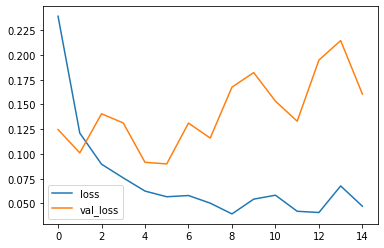

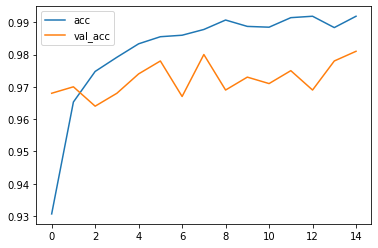

In [6]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()